# Proyecto Final

La finalidad de este proyecto es brindarte información y análisis que te permitan evaluar la viabilidad de comprar una casa en Barcelona, teniendo en cuenta los parámetros y criterios como metros cuadrados, distrito, estado de la propiedad, vistas, ascensor, y precio. El objetivo principal es proporcionarte orientación y apoyo en tu proceso de toma de decisiones de inversión inmobiliaria.

> _...A través de este proyecto, se realizará un análisis detallado del mercado inmobiliario en Barcelona, teniendo en cuenta factores como la ubicación, el tamaño de la vivienda, el precio, las tendencias del mercado y otros aspectos relevantes. Se recopilarán datos sobre la oferta y demanda de viviendas en diferentes áreas de Barcelona, así como información sobre los precios históricos y las perspectivas futuras.

# OBJETIVO:
El objetivo principal de este proyecto es utilizar herramientas y técnicas de análisis de datos para evaluar la rentabilidad potencial de la inversión en una casa en Barcelona. Esto incluirá cálculos de retorno de la inversión, estimaciones de crecimiento del valor de la propiedad y análisis de factores económicos y legales que puedan afectar el mercado inmobiliario y asi proporcionar una evaluación integral y fundamentada sobre la viabilidad de comprar una casa en Barcelona, considerando los parámetros y criterios específicos. Esto permitirá tomar decisiones informadas y maximizar oportunidades de inversión en el mercado inmobiliario de Barcelona.

## 1. Generar la pregunta de investigación

**Pregunta:** _"¿Cuál es el rango de precios más adecuado para buscar una casa en Barcelona que cumpla con mis requisitos y se ajuste a mi presupuesto?"

In [2]:
# Importamos las librerías que vamos a necesitar
import numpy as np
import pandas as pd
import os
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report

### Importar los datos

**Carga los datos en un DataFrame de Pandas llamado `data`.**

In [3]:


data_url = r"C:\Users\Ferran\OneDrive - es.logicalis.com\Escritorio\hkgn\hkgn pf\Barcelona_Idealista.csv"

if os.path.exists(data_url):
    raw_df = pd.read_csv(data_url, sep=";")
    # Resto del código...
else:
    print("El archivo no existe en la ubicación especificada.")

**Muestra las 5 primeras filas.**

In [4]:
print(raw_df.head(10))

              district  rooms  area_m2 lift   prices
0             Eixample      3      351  Yes  2300000
1  Sarrià-Sant Gervasi      5      298  Yes  1750000
2             Eixample      2       90  Yes   590000
3             Eixample      2      130  Yes   450000
4       Horta-Guinardó      3      110   No   430000
5             Eixample      5      161  Yes   690000
6             Eixample      2      110   No   395000
7             Eixample      3      106  Yes   595000
8            Les Corts      2       62  Yes   450000
9         Ciutat Vella      5      152  Yes   665000


**Muestra las 10 últimas filas.**

In [5]:
print(raw_df.tail(10))

                 district  rooms  area_m2 lift   prices
3255             Eixample      4      120  Yes   500000
3256             Eixample      3       96  Yes   419000
3257  Sarrià-Sant Gervasi      7      743  Yes  4500000
3258             Eixample      3       90   No   385000
3259  Sarrià-Sant Gervasi      2       95  Yes   595000
3260               Gràcia      1       64  Yes   295000
3261         Ciutat Vella      3       99   No   420000
3262            Les Corts      4      127  Yes   545000
3263           Sant Martí      3       64   No   170000
3264         Ciutat Vella      4       70   No   178800


### Análisis descriptivo de las variables

**Imprime la información básica del dataset.**

In [6]:
import os
import pandas as pd

data_url = r"C:\Users\Ferran\OneDrive - es.logicalis.com\Escritorio\hkgn\hkgn pf\Barcelona_Idealista.csv"

if os.path.exists(data_url):
    raw_df = pd.read_csv(data_url, sep=";")
    # Resto del código...

    # Ahora puedes llamar al método info() en la variable 'raw_df'
    raw_df.info()
else:
    print("El archivo no existe en la ubicación especificada.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3265 entries, 0 to 3264
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  3265 non-null   object
 1   rooms     3265 non-null   int64 
 2   area_m2   3265 non-null   int64 
 3   lift      3265 non-null   object
 4   prices    3265 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 127.7+ KB


**Muestra el número de filas/registros y columnas/variables del dataset.**

In [7]:
raw_df = pd.read_csv(data_url, sep=";")
num_filas, num_columnas = raw_df.shape
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

Número de filas: 3265
Número de columnas: 5


**Muestra el resumen estadístico de las variables numéricas del conjunto de datos.**

In [8]:
data = pd.read_csv(data_url, sep=";")
resumen_estadistico = data.describe()
print(resumen_estadistico)

             rooms      area_m2        prices
count  3265.000000  3265.000000  3.265000e+03
mean      3.160796   121.566616  6.004200e+05
std       1.325257    92.721515  6.522661e+05
min       1.000000    20.000000  4.900000e+04
25%       2.000000    72.000000  2.799000e+05
50%       3.000000    93.000000  4.190000e+05
75%       4.000000   135.000000  6.550000e+05
max      13.000000   900.000000  1.200000e+07


Más información sobre esta función en [Pandas Describe, Explained](https://www.sharpsightlabs.com/blog/pandas-describe/).

In [9]:
# Reemplaza 'data' con el nombre de la variable que contiene tus características
X = data[['area_m2', 'prices']]  # Selecciona las columnas 'area_m2' y 'prices'

# Reemplaza 'data' con el nombre de la variable que contiene tus etiquetas
y = data['district']  # Selecciona la columna 'district' como etiqueta

# Utiliza la función train_test_split para dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=4)

# Imprime las formas de los conjuntos de entrenamiento y prueba
print('Entrenamiento y prueba: {} {}'.format(X_train.shape, X_test.shape))

Entrenamiento y prueba: (2612, 2) (653, 2)


In [10]:
data = pd.read_csv(data_url, sep=";")

# Extraer las columnas 'area_m2' y 'prices' como características (X)
X = data[['area_m2', 'prices']]

# Codificar la columna 'district' utilizando one-hot encoding
district_encoded = pd.get_dummies(data['district'])

# Concatenar las características y las columnas codificadas
X_encoded = pd.concat([X, district_encoded], axis=1)

# Extraer la columna 'district' codificada como la variable objetivo (y)
y = district_encoded

# Crear una instancia del modelo de Random Forest Regressor
reg = RandomForestRegressor()

# Entrenar el modelo utilizando los datos de las características y la variable objetivo
reg.fit(X_encoded, y)

RandomForestRegressor()

In [11]:
from sklearn import metrics

# Leer el archivo CSV y asignar los datos a la variable 'data'
data = pd.read_csv(data_url, sep=";")

# Extraer la columna 'prices' como la variable objetivo (y)
y = data['prices']

# Crear una instancia del modelo de Random Forest Regressor
reg = RandomForestRegressor()

# Entrenar el modelo utilizando los datos de la columna 'prices'
reg.fit(data['area_m2'].values.reshape(-1, 1), y)

# Predecir los valores de la variable objetivo utilizando los datos de entrenamiento
y_pred = reg.predict(data['area_m2'].values.reshape(-1, 1))

# Calcular las métricas de evaluación
r2 = metrics.r2_score(y, y_pred)
adj_r2 = 1 - (1 - r2) * (len(y) - 1) / (len(y) - 1 - 1)
mae = metrics.mean_absolute_error(y, y_pred)
mse = metrics.mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

# Imprimir las métricas
print('R^2:', r2)
print('Adjusted R^2:', adj_r2)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)


R^2: 0.8094649965721008
Adjusted R^2: 0.8094066039875382
MAE: 154813.75821197938
MSE: 81038502866.01521
RMSE: 284672.62401926744


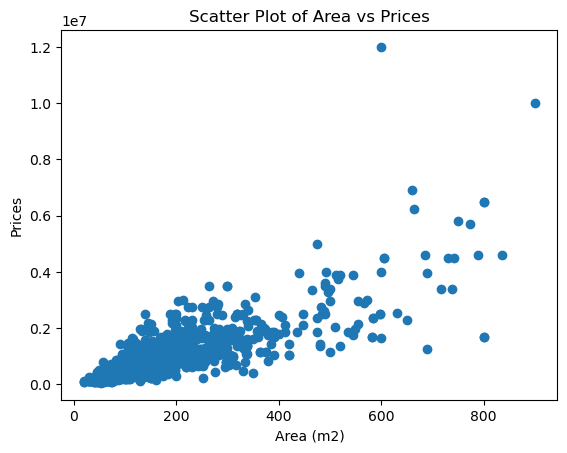

In [12]:
import matplotlib.pyplot as plt

plt.scatter(raw_df['area_m2'], raw_df['prices'])
plt.xlabel('Area (m2)')
plt.ylabel('Prices')
plt.title('Scatter Plot of Area vs Prices')

plt.show()

In [13]:
import pandas as pd

# Leer el archivo CSV y asignar los datos a la variable 'data'
data = pd.read_csv(data_url, sep=";")

# Identificar la variable de salida
variable_salida = 'district'

# Identificar las características
caracteristicas = ['prices', 'area_m2']

# Obtener información sobre la variable de salida
salida_info = data[variable_salida].value_counts()

# Obtener información sobre las características
caracteristicas_info = data[caracteristicas].describe()

# Imprimir la información sobre la variable de salida
print("Variable de salida:", variable_salida)
print("Número de categorías:", len(salida_info))
print("Categorías y recuentos:")
print(salida_info)

# Imprimir la información sobre las características
print("\nCaracterísticas:")
print(caracteristicas_info)

Variable de salida: district
Número de categorías: 10
Categorías y recuentos:
Eixample               788
Sarrià-Sant Gervasi    519
Sant Martí             420
Ciutat Vella           340
Sants-Montjuïc         271
Les Corts              257
Horta-Guinardó         206
Gràcia                 205
Sant Andreu            155
Nou Barris             104
Name: district, dtype: int64

Características:
             prices      area_m2
count  3.265000e+03  3265.000000
mean   6.004200e+05   121.566616
std    6.522661e+05    92.721515
min    4.900000e+04    20.000000
25%    2.799000e+05    72.000000
50%    4.190000e+05    93.000000
75%    6.550000e+05   135.000000
max    1.200000e+07   900.000000


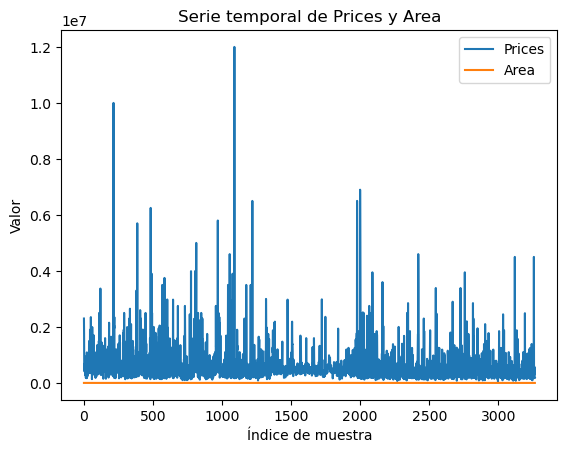

In [14]:
data = pd.read_csv(data_url, sep=";")

# Obtener los datos de las columnas 'prices' y 'area_m2'
prices = data['prices']
area = data['area_m2']

# Crear un rango de índices para la serie temporal
indice_muestra = range(len(prices))

# Graficar las series temporales de 'prices' y 'area_m2'
plt.plot(indice_muestra, prices, label='Prices')
plt.plot(indice_muestra, area, label='Area')
plt.xlabel('Índice de muestra')
plt.ylabel('Valor')
plt.title('Serie temporal de Prices y Area')
plt.legend()
plt.show()

In [15]:
sns.set_style('white')

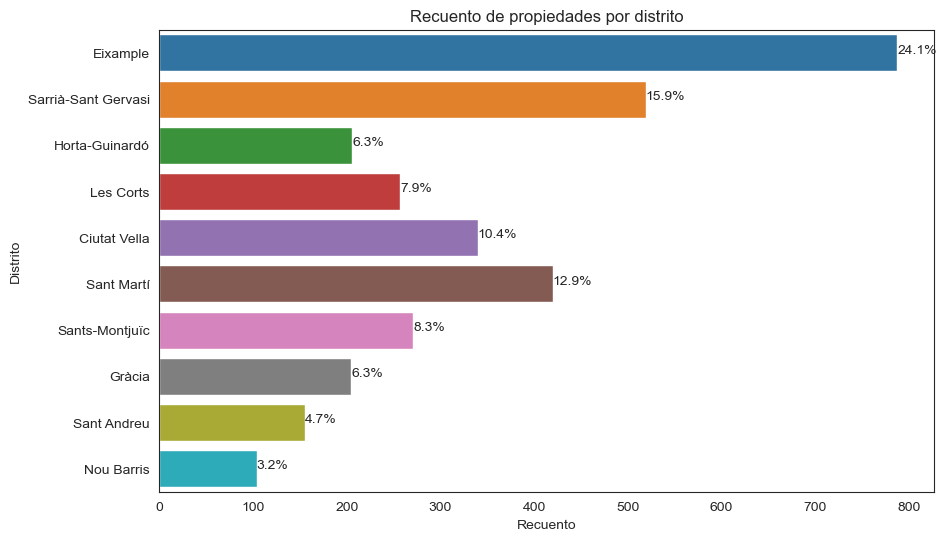

In [16]:
import seaborn as sns

# Crea el count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, y="district")

# Calcula los porcentajes y muestra los valores en el gráfico
total = len(data)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y))

# Personaliza el gráfico
plt.xlabel("Recuento")
plt.ylabel("Distrito")
plt.title("Recuento de propiedades por distrito")

plt.show()

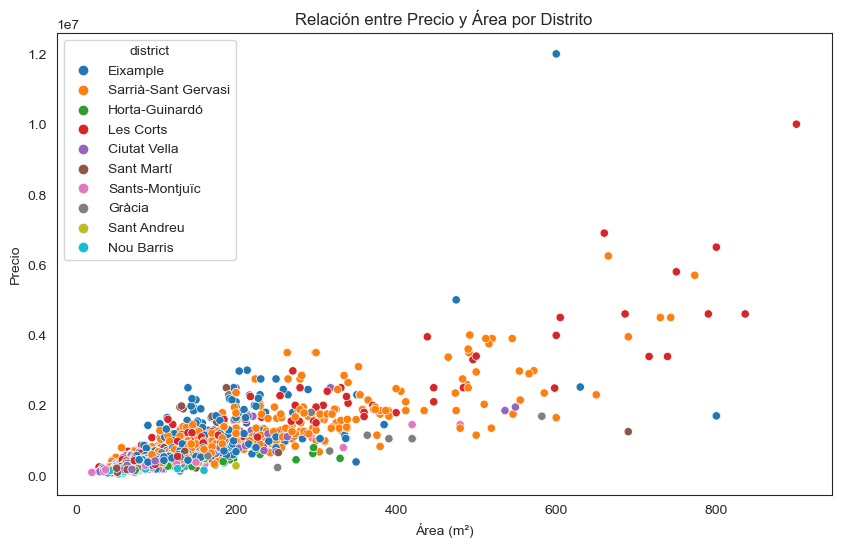

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="area_m2", y="prices", hue="district")

# Personalizar el gráfico
plt.xlabel("Área (m²)")
plt.ylabel("Precio")
plt.title("Relación entre Precio y Área por Distrito")

plt.show()

In [20]:
# Leer los datos del archivo CSV
data = pd.read_csv(r"C:\Users\Ferran\OneDrive - es.logicalis.com\Escritorio\hkgn\hkgn pf\Barcelona_Idealista.csv")  # Reemplaza "tu_archivo.csv" con el nombre de tu archivo

# Comprobar valores ausentes en el DataFrame
missing_values = data.isnull().sum()

# Filtrar las variables con valores ausentes
variables_ausentes = missing_values[missing_values > 0]

# Mostrar las variables con valores ausentes y su cantidad
print("Variables con valores ausentes:")
print(variables_ausentes)

Variables con valores ausentes:
Series([], dtype: int64)


In [21]:
duplicates = data.duplicated()

# Contar el número de valores duplicados
num_duplicates = duplicates.sum()

# Mostrar el resultado
if num_duplicates > 0:
    print("Hay valores duplicados en el DataFrame.")
    print("Número de valores duplicados:", num_duplicates)
else:
    print("No hay valores duplicados en el DataFrame.")

Hay valores duplicados en el DataFrame.
Número de valores duplicados: 192


In [22]:
# Eliminar los valores duplicados
data_sin_duplicados = data.drop_duplicates()

# Verificar el número de filas después de eliminar los duplicados
num_filas_sin_duplicados = len(data_sin_duplicados)
print("Número de filas después de eliminar duplicados:", num_filas_sin_duplicados)

Número de filas después de eliminar duplicados: 3073


In [23]:
num_columnas_sin_duplicados = data_sin_duplicados.shape[1]
print("Número de columnas después de eliminar duplicados:", num_columnas_sin_duplicados)

Número de columnas después de eliminar duplicados: 1


In [24]:
print(raw_df.head(10))

              district  rooms  area_m2 lift   prices
0             Eixample      3      351  Yes  2300000
1  Sarrià-Sant Gervasi      5      298  Yes  1750000
2             Eixample      2       90  Yes   590000
3             Eixample      2      130  Yes   450000
4       Horta-Guinardó      3      110   No   430000
5             Eixample      5      161  Yes   690000
6             Eixample      2      110   No   395000
7             Eixample      3      106  Yes   595000
8            Les Corts      2       62  Yes   450000
9         Ciutat Vella      5      152  Yes   665000


In [25]:
data.drop_duplicates(inplace=True)

# Resetea el índice
data.reset_index(drop=True, inplace=True)

# Muestra las dimensiones del dataset
filas, columnas = data.shape
print("Número de filas:", filas)
print("Número de columnas:", columnas)

Número de filas: 3073
Número de columnas: 1


In [26]:
tipos_de_datos = data.dtypes

# Mostrar los tipos de datos de todas las columnas
print(tipos_de_datos)

district;rooms;area_m2;lift;prices    object
dtype: object


In [27]:
tipos_de_datos = data.dtypes

# Mostrar los tipos de datos de todas las columnas
print(tipos_de_datos)

district;rooms;area_m2;lift;prices    object
dtype: object


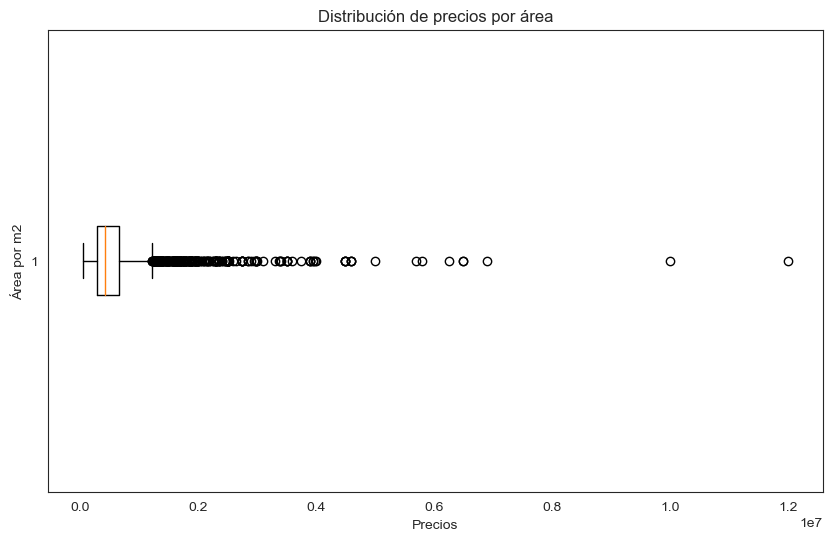

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Carga los datos desde el archivo CSV
data = pd.read_csv("C:\\Users\\Ferran\\OneDrive - es.logicalis.com\\Escritorio\\hkgn\\hkgn pf\\Barcelona_Idealista.csv", sep=";")

# Convierte la columna "area_m2" a tipo int
data['area_m2'] = data['area_m2'].astype(int)

# Crea el gráfico de boxplot
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura según tus preferencias
plt.boxplot(data['prices'], vert=False)  # Crea el boxplot para la variable "prices"
plt.xlabel('Precios')  # Etiqueta del eje X
plt.ylabel('Área por m2')  # Etiqueta del eje Y
plt.title('Distribución de precios por área')  # Título del gráfico
plt.show()

In [29]:
import pandas as pd
import plotly.express as px

# Carga los datos desde el archivo CSV
data = pd.read_csv("C:\\Users\\Ferran\\OneDrive - es.logicalis.com\\Escritorio\\hkgn\\hkgn pf\\Barcelona_Idealista.csv", sep=";")

# Crea el gráfico de histograma con Plotly
fig = px.histogram(data, x="prices", y="area_m2", nbins=30)
fig.update_layout(
    title="Distribución de precios según los metros cuadrados",
    xaxis_title="Precios",
    yaxis_title="Área por m2"
)
fig.show()

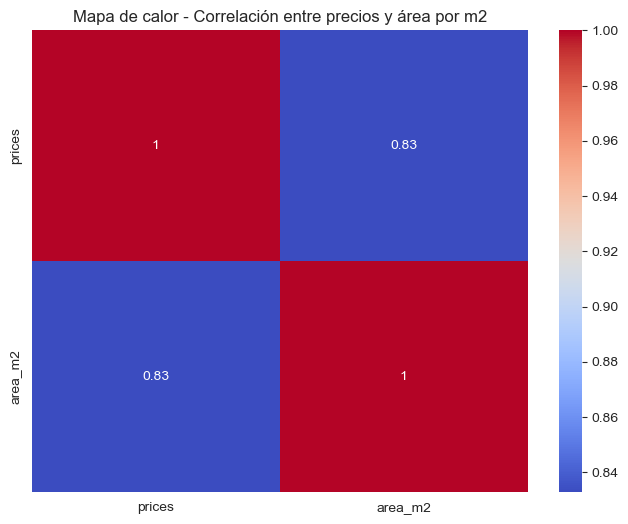

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carga los datos desde el archivo CSV
data = pd.read_csv("C:\\Users\\Ferran\\OneDrive - es.logicalis.com\\Escritorio\\hkgn\\hkgn pf\\Barcelona_Idealista.csv", sep=";")

# Calcula la matriz de correlación
correlation_matrix = data[['prices', 'area_m2']].corr()

# Crea el mapa de calor con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de calor - Correlación entre precios y área por m2')
plt.show()

C:\Users\Ferran\AppData\Local\Temp\ipykernel_20200\3831753914.py:15: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



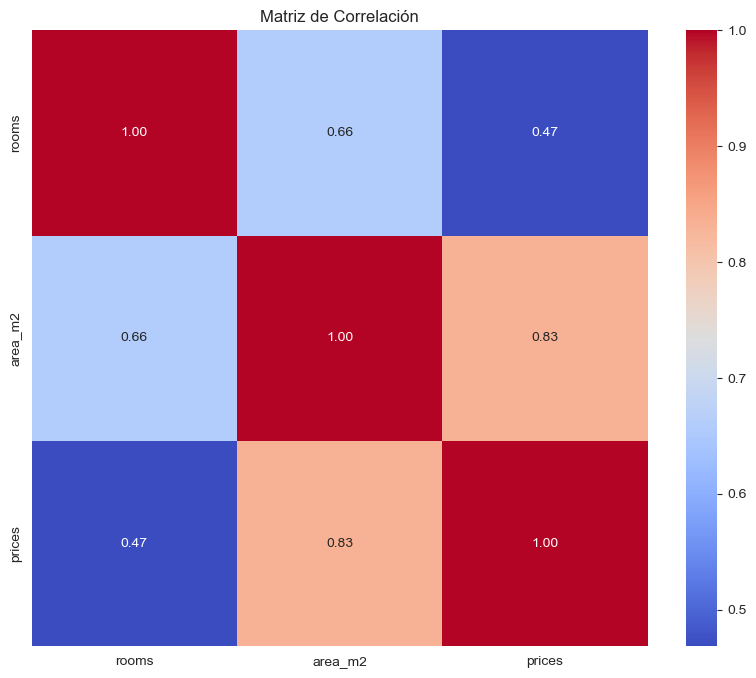

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener los datos
data = pd.read_csv("C:\\Users\\Ferran\\OneDrive - es.logicalis.com\\Escritorio\\hkgn\\hkgn pf\\Barcelona_Idealista.csv", sep=";")

# Seleccionar las variables de interés
variables = ['district', 'rooms', 'area_m2', 'lift', 'prices']

# Obtener los datos de interés
data_subset = data[variables]

# Calcular la matriz de correlación
correlation_matrix = data_subset.corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Matriz de Correlación")
plt.show()

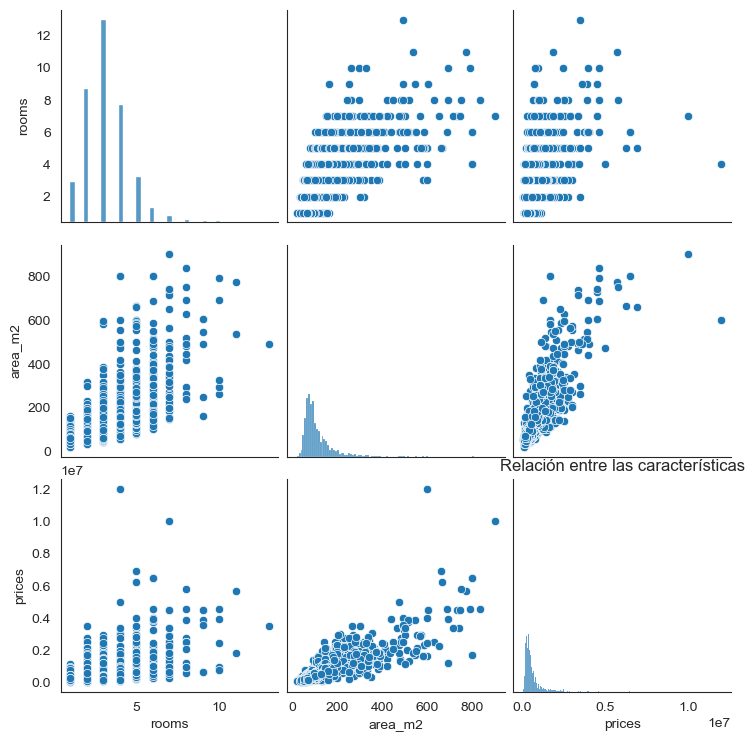

In [32]:
import seaborn as sns

# Seleccionar las variables de interés
variables = ['district', 'rooms', 'area_m2', 'lift', 'prices']

# Obtener los datos de interés
data_subset = data[variables]

# Crear el pair plot
sns.pairplot(data_subset)
plt.title("Relación entre las características")
plt.show()

In [33]:
!pip install xgboost

In [34]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Cargar los datos en un DataFrame separando las columnas con punto y coma (;)
df = pd.read_csv(r"C:\Users\Ferran\OneDrive - es.logicalis.com\Escritorio\hkgn\hkgn pf\Barcelona_Idealista.csv", delimiter=';')

# Crear una instancia del codificador one-hot
encoder = OneHotEncoder()

# Ajustar y transformar los datos de la columna 'district' usando el codificador
district_encoded = encoder.fit_transform(df[['district']]).toarray()

# Crear un nuevo DataFrame con las características codificadas
encoded_data = pd.concat([df.drop('district', axis=1), pd.DataFrame(district_encoded)], axis=1)

# Mostrar el DataFrame resultante
print(encoded_data.head())

   rooms  area_m2 lift   prices    0    1    2    3    4    5    6    7    8  \
0      3      351  Yes  2300000  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1      5      298  Yes  1750000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2      2       90  Yes   590000  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      2      130  Yes   450000  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4      3      110   No   430000  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   

     9  
0  0.0  
1  1.0  
2  0.0  
3  0.0  
4  0.0  


In [35]:
print(len(y_train))
print(len(y_pred))

2612
3265


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

# Copiar el dataframe original para mantener los datos sin modificar
df_encoded = df.copy()

# Codificar todas las columnas categóricas utilizando LabelEncoder
label_encoder = LabelEncoder()
for column in df_encoded.select_dtypes(include='object'):
    df_encoded[column] = label_encoder.fit_transform(df[column])

# Aplicar la codificación one-hot a todas las columnas categóricas
encoded_df = pd.get_dummies(df_encoded)

# Separar las características y la variable objetivo
X = encoded_df.drop('prices', axis=1)
y = encoded_df['prices']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear una instancia del modelo de regresión
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de entrenamiento
y_pred = model.predict(X_train)

# Calcular las métricas
r2 = metrics.r2_score(y_train, y_pred)
adj_r2 = 1 - (1 - r2) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)
mae = metrics.mean_absolute_error(y_train, y_pred)
mse = metrics.mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)

# Imprimir las métricas
print('R^2:', r2)
print('Adjusted R^2:', adj_r2)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

R^2: 0.7023620994916816
Adjusted R^2: 0.7019054245388495
MAE: 166667.3040889833
MSE: 118366443668.96672
RMSE: 344044.24667325383


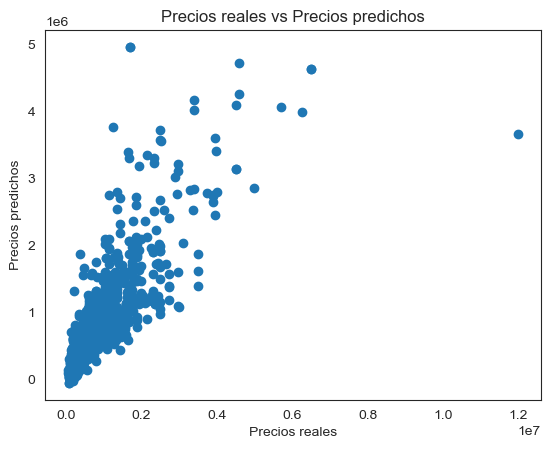

In [44]:
import matplotlib.pyplot as plt

# Visualizar las diferencias entre los precios reales y los valores predichos
plt.scatter(y_train, y_pred)
plt.xlabel("Precios reales")
plt.ylabel("Precios predichos")
plt.title("Precios reales vs Precios predichos")
plt.show()

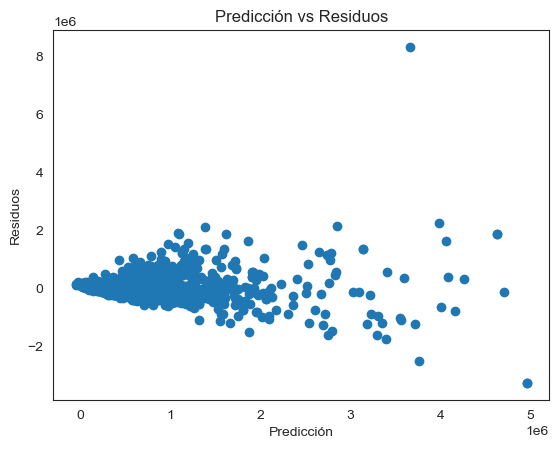

In [45]:
# Comprobar los residuos
plt.scatter(y_pred, y_train - y_pred)
plt.title("Predicción vs Residuos")
plt.xlabel("Predicción")
plt.ylabel("Residuos")
plt.show()

In [46]:
from sklearn import metrics

y_test_pred = model.predict(X_test)  # Predicción en el conjunto de prueba

# Evaluación del modelo
acc_r2 = metrics.r2_score(y_test, y_test_pred)
adj_r2 = 1 - (1 - metrics.r2_score(y_test, y_test_pred)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
mae = metrics.mean_absolute_error(y_test, y_test_pred)
mse = metrics.mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

print('R^2:', acc_r2)
print('Adjusted R^2:', adj_r2)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

R^2: 0.738780786598996
Adjusted R^2: 0.7371683223187429
MAE: 174583.96477090844
MSE: 139778517428.43768
RMSE: 373869.6529921059


In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # Crear el objeto para el escalado
X_train_scaled = scaler.fit_transform(X_train)  # Escalar el conjunto de entrenamiento
X_test_scaled = scaler.transform(X_test)  # Escalar el conjunto de prueba usando los mismos parámetros de ajuste del conjunto de entrenamiento

In [49]:
from sklearn.svm import SVR

# Crear un objeto de Regresor SVM
reg = SVR()
reg.fit(X_train, y_train)

SVR()

In [50]:
###modelo prediccion 
y_pred = reg.predict(X_train)
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: -0.07749306745284401
Adjusted R^2: -0.07914629808951879
MAE: 317103.2751016661
MSE: 428503971619.6854
RMSE: 654602.1475825491


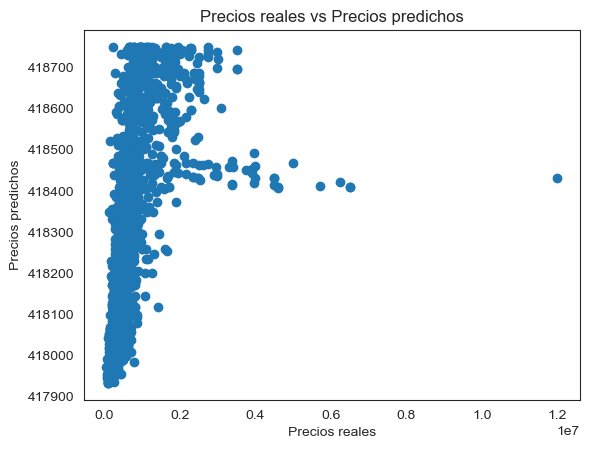

In [52]:
import matplotlib.pyplot as plt

# Obtener las predicciones del modelo en el conjunto de entrenamiento
y_train_pred = reg.predict(X_train)

# Visualizar las diferencias entre los precios reales y las predicciones
plt.scatter(y_train, y_train_pred)
plt.xlabel("Precios reales")
plt.ylabel("Precios predichos")
plt.title("Precios reales vs Precios predichos")
plt.show()

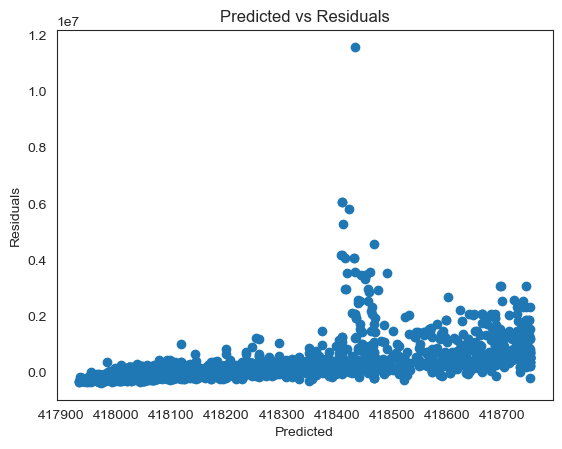

In [53]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, y_train - y_pred)
plt.title("Predicted vs Residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [54]:
y_test_pred = reg.predict(X_test)
# Model Evaluation
acc_svm = metrics.r2_score(y_test, y_test_pred)
adjusted_r2 = 1 - (1 - metrics.r2_score(y_test, y_test_pred)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
mae = metrics.mean_absolute_error(y_test, y_test_pred)
mse = metrics.mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

print('R^2:', acc_svm)
print('Adjusted R^2:', adjusted_r2)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

R^2: -0.07960653790227301
Adjusted R^2: -0.08627077579055875
MAE: 347924.7703928162
MSE: 577697939249.0896
RMSE: 760064.4309853538


In [56]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import svm

# Crear los objetos de los modelos
reg = LinearRegression()
rf = RandomForestRegressor()
xgb = XGBRegressor()
svm = svm.SVR()

# Entrenar los modelos
reg.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Obtener las puntuaciones R² en los datos de prueba
r2_reg = reg.score(X_test, y_test) * 100
r2_rf = rf.score(X_test, y_test) * 100
r2_xgb = xgb.score(X_test, y_test) * 100
r2_svm = svm.score(X_test, y_test) * 100

# Crear el DataFrame de los modelos y las puntuaciones R²
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Support Vector Machines'],
    'R-squared Score': [r2_reg, r2_rf, r2_xgb, r2_svm]
})

# Ordenar el DataFrame por puntuaciones R² en orden descendente
models.sort_values(by='R-squared Score', ascending=False)

Model  R-squared Score
1            Random Forest        75.387710
0        Linear Regression        73.878079
2                  XGBoost        72.151104
3  Support Vector Machines        -7.960654

In [57]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Support Vector Machines'],
    'R-squared Score': [reg.score(X_test, y_test), rf.score(X_test, y_test), xgb.score(X_test, y_test), svm.score(X_test, y_test)]
})

# Ordenar los modelos por el R² de forma descendente
models = models.sort_values(by='R-squared Score', ascending=False)

# Imprimir el resultado
print(models)

                     Model  R-squared Score
1            Random Forest         0.753877
0        Linear Regression         0.738781
2                  XGBoost         0.721511
3  Support Vector Machines        -0.079607


In [58]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Crear los modelos
rf = RandomForestRegressor()
lr = LinearRegression()

# Entrenar los modelos
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_test_pred_rf = rf.predict(X_test)
y_test_pred_lr = lr.predict(X_test)

# Calcular el R² para cada modelo
r2_rf = r2_score(y_test, y_test_pred_rf)
r2_lr = r2_score(y_test, y_test_pred_lr)

# Crear el DataFrame de resultados
models = pd.DataFrame({
    'Model': ['Random Forest', 'Linear Regression'],
    'R-squared Score': [r2_rf, r2_lr]
})

# Ordenar los modelos por el valor del R² en orden descendente
models = models.sort_values(by='R-squared Score', ascending=False)

# Imprimir los resultados
print(models)

               Model  R-squared Score
0      Random Forest         0.746179
1  Linear Regression         0.738781


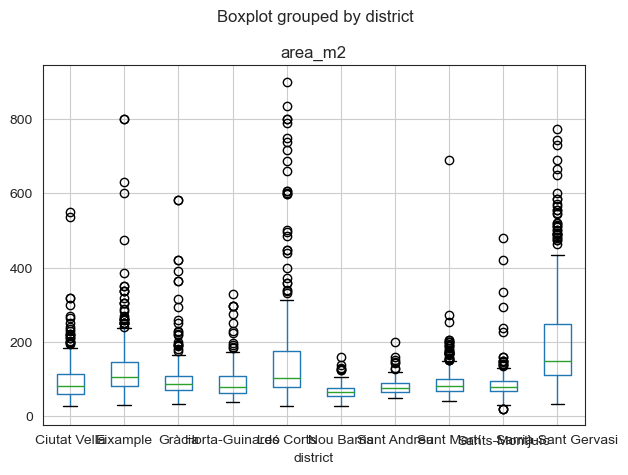

In [62]:
raw_df.boxplot(column='area_m2', by='district')
plt.tight_layout()
plt.show()

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [64]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [66]:
# Dividir los datos en conjuntos de entrenamiento y validación cruzada
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2, random_state=4)

# Hacer predicciones en el conjunto de entrenamiento
predictions_train = model.predict(X_train)

# Hacer predicciones en el conjunto de validación cruzada
predictions_cv = model.predict(X_cv)

In [67]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_train, predictions_train))
print(accuracy_score(y_train, predictions_train))

              precision    recall  f1-score   support

       49000       1.00      1.00      1.00         1
       69000       1.00      1.00      1.00         1
       76000       1.00      1.00      1.00         1
       79000       1.00      1.00      1.00         1
       80000       0.00      0.00      0.00         0
       87000       1.00      1.00      1.00         2
       89500       1.00      1.00      1.00         1
       90000       0.50      1.00      0.67         1
       95000       0.00      0.00      0.00         1
       96000       0.00      0.00      0.00         1
       99000       0.67      0.67      0.67         3
      100000       0.00      0.00      0.00         1
      105000       0.67      1.00      0.80         2
      107000       0.25      1.00      0.40         1
      109000       0.50      1.00      0.67         1
      112000       1.00      1.00      1.00         1
      114900       0.00      0.00      0.00         1
      115000       0.00    

C:\Users\Ferran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Ferran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\Users\Ferran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Ferran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` p

In [70]:
# Realizar predicciones en los datos de validación cruzada (cv)
predictions = model.predict(X_cv)

# Imprimir el informe de clasificación y el puntaje de precisión en los datos de validación cruzada
print(classification_report(y_cv, predictions))
print(accuracy_score(y_cv, predictions))

              precision    recall  f1-score   support

       69000       0.00      0.00      0.00         0
       80000       0.50      1.00      0.67         1
       93000       0.00      0.00      0.00         1
       95000       0.00      0.00      0.00         1
      100000       0.50      1.00      0.67         1
      103000       0.00      0.00      0.00         1
      105000       0.00      0.00      0.00         0
      115000       0.00      0.00      0.00         1
      120000       1.00      1.00      1.00         1
      125000       1.00      1.00      1.00         2
      129000       1.00      1.00      1.00         1
      130000       0.00      0.00      0.00         0
      131000       1.00      1.00      1.00         1
      132000       0.00      0.00      0.00         1
      133900       0.00      0.00      0.00         0
      134000       1.00      1.00      1.00         1
      135000       0.25      1.00      0.40         1
      137000       0.00    

C:\Users\Ferran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Ferran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\Users\Ferran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Ferran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` p

In [71]:
from sklearn import tree

# Obtener la representación textual del modelo
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_2 <= 114.50
|   |--- feature_2 <= 80.50
|   |   |--- feature_1 <= 3.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- feature_2 <= 43.50
|   |   |   |   |   |--- feature_1 <= 1.50
|   |   |   |   |   |   |--- feature_2 <= 34.50
|   |   |   |   |   |   |   |--- feature_0 <= 8.50
|   |   |   |   |   |   |   |   |--- feature_2 <= 29.50
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 4.00
|   |   |   |   |   |   |   |   |   |   |--- class: 119000
|   |   |   |   |   |   |   |   |   |--- feature_0 >  4.00
|   |   |   |   |   |   |   |   |   |   |--- class: 90000
|   |   |   |   |   |   |   |   |--- feature_2 >  29.50
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 4.50
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 158000
|   |   |   |   |   |   |  

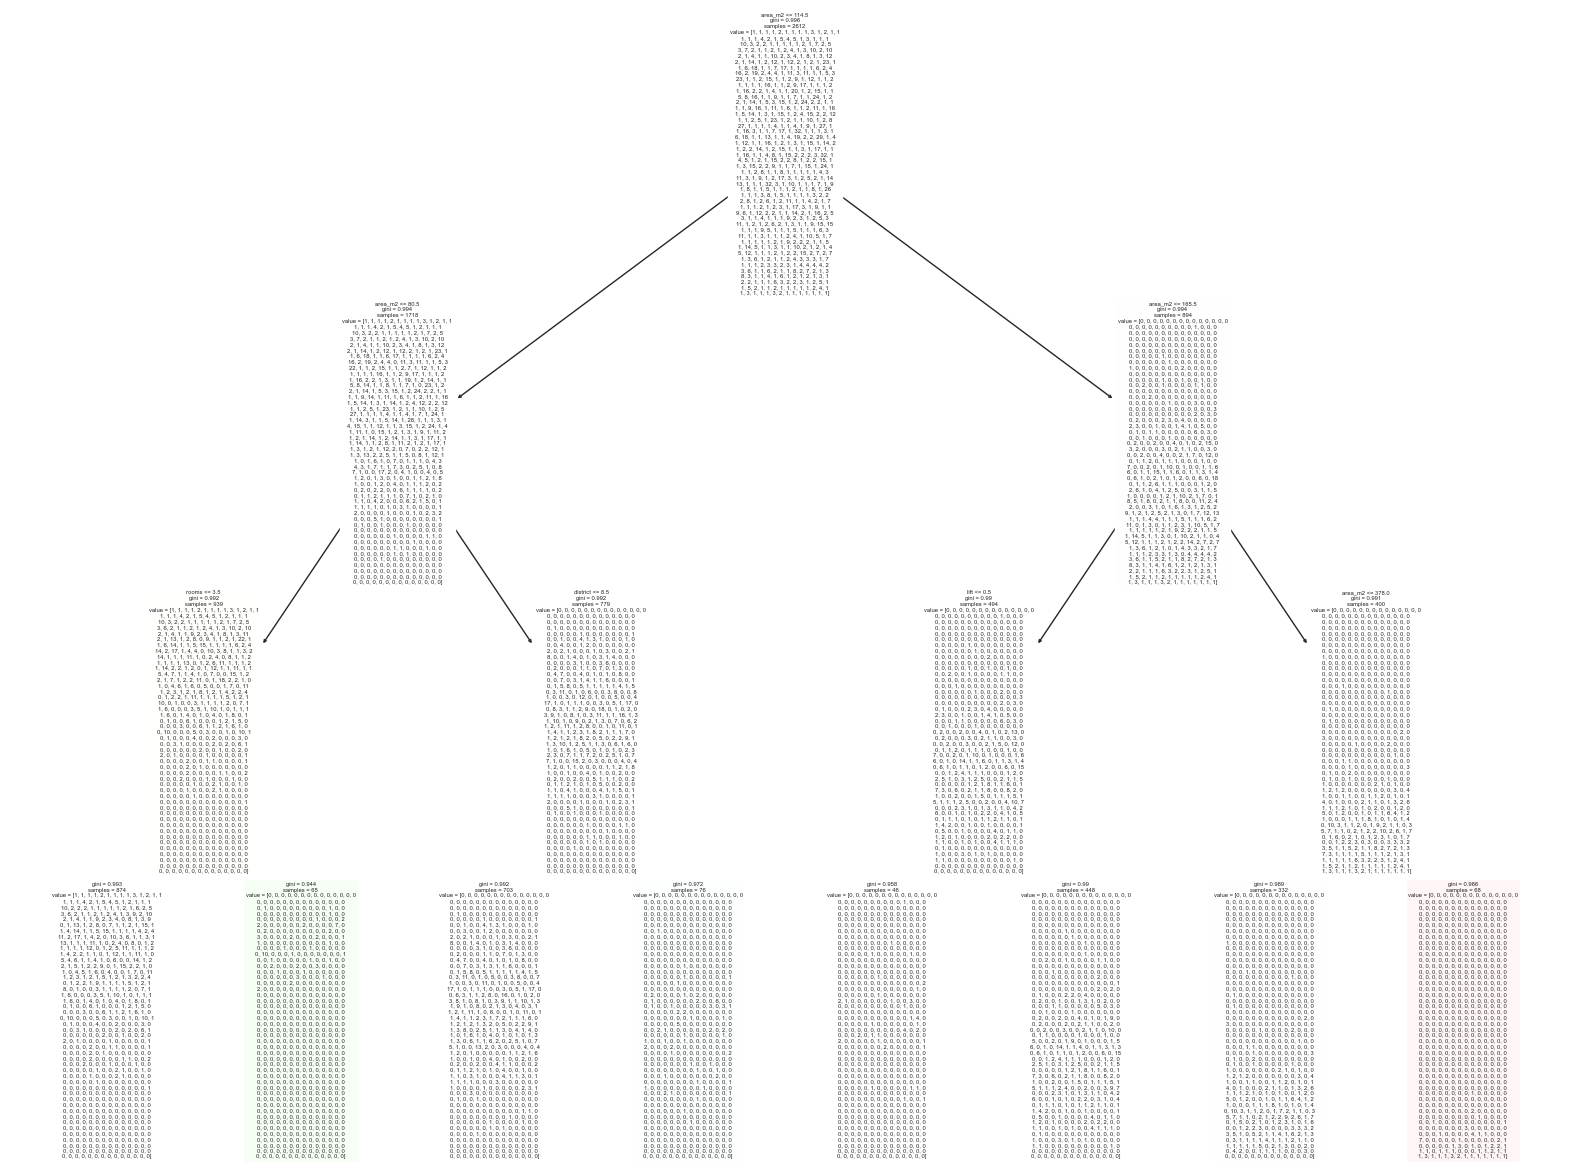

In [75]:
from sklearn import tree
import matplotlib.pyplot as plt

# Ajustar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Ajustar el tamaño de la figura
fig = plt.figure(figsize=(20, 15))

# Generar el gráfico del árbol de decisiones
_ = tree.plot_tree(model,
                   feature_names=X_train.columns,
                   filled=True)

plt.show()

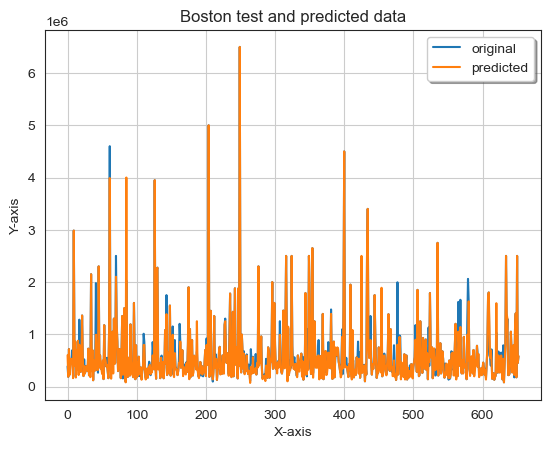

In [76]:
x_ax = range(len(y_cv))
plt.plot(x_ax, y_cv, label="original")
plt.plot(x_ax, predictions, label="predicted")
plt.title("Boston test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()